In [ ]:
from google.colab import files

# Upload kaggle.json file
files.upload()


In [ ]:
# Install Kaggle API
!pip install -q kaggle

# Create the .kaggle directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Download the food101 dataset
!kaggle datasets download -d kmader/food41

# Unzip the dataset
!unzip food41.zip -d dataset

#+- 3-6 min runtime

Streaming output truncated to the last 5000 lines.
  inflating: dataset/images/tacos/1026681.jpg  
  inflating: dataset/images/tacos/1030289.jpg  
  inflating: dataset/images/tacos/1033196.jpg  
  inflating: dataset/images/tacos/1036030.jpg  
  inflating: dataset/images/tacos/1042175.jpg  
  inflating: dataset/images/tacos/1044043.jpg  
  inflating: dataset/images/tacos/1058697.jpg  
  inflating: dataset/images/tacos/1059239.jpg  
  inflating: dataset/images/tacos/1059326.jpg  
  inflating: dataset/images/tacos/1066762.jpg  
  inflating: dataset/images/tacos/1070967.jpg  
  inflating: dataset/images/tacos/1073468.jpg  
  inflating: dataset/images/tacos/1075296.jpg  
  inflating: dataset/images/tacos/1085243.jpg  
  inflating: dataset/images/tacos/108529.jpg  
  inflating: dataset/images/tacos/1086014.jpg  
  inflating: dataset/images/tacos/108945.jpg  
  inflating: dataset/images/tacos/1089575.jpg  
  inflating: dataset/images/tacos/1091159.jpg  
  inflating: dataset/images/tacos/11013

In [ ]:
!ls dataset/images

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheesecake	    grilled_salmon	     risotto
cheese_plate	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

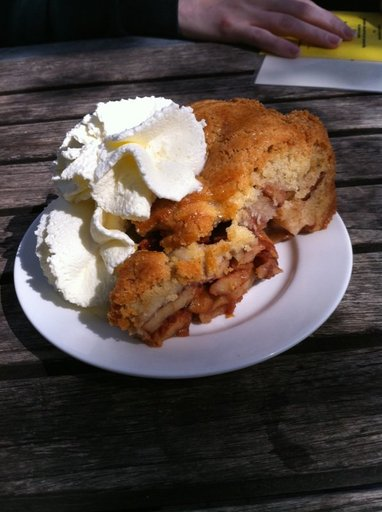

In [ ]:
#test images

import cv2
from google.colab.patches import cv2_imshow # Import the alternative function


imagesss = cv2.imread('dataset/images/apple_pie/103801.jpg')
cv2_imshow(imagesss) # Use cv2_imshow instead of cv2.imshow

In [ ]:
import os
import shutil
import os
import shutil

def organize_dataset(file_path, images_path, output_dir, class_limit):
    """
    Organize dataset by limiting the number of classes (folders) copied
    and copying all images for those selected classes as listed in file_path.

    Args:
        file_path (str): Path to .txt file containing image paths.
        images_path (str): Base path to source image directory.
        output_dir (str): Path to output directory for reorganized dataset.
        class_limit (int): Maximum number of classes (folders) to copy.
    """
    processed_classes = set()  # Keep track of how many classes (folders) are processed

    # Read all lines from the txt file
    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        # Split the line into class name (folder name) and image file name
        class_name, img_file = line.strip().split('/')
        source_path = os.path.join(images_path, class_name, img_file + '.jpg')  # Full source path
        target_dir = os.path.join(output_dir, class_name)  # Target directory for this class

        # Skip if the image file doesn't exist
        if not os.path.exists(source_path):
            continue

        # Stop if the limit on the number of classes is reached
        if len(processed_classes) >= class_limit and class_name not in processed_classes:
            break

        # Ensure the target directory for the class exists
        os.makedirs(target_dir, exist_ok=True)

        # Copy the image to the target directory
        shutil.copy(source_path, target_dir)

        # Add the class to the processed_classes set
        processed_classes.add(class_name)

# Restructure training and testing datasets
images_path1 = 'dataset/images'
train_file1 = 'dataset/meta/meta/train.txt'
test_file1 = 'dataset/meta/meta/test.txt'

'''organize_dataset(train_file1, images_path1, 'dataset/train', limit_per_class=750)
organize_dataset(test_file1, images_path1, 'dataset/test', limit_per_class=250)'''

organize_dataset(train_file1, images_path1, 'dataset/train', class_limit=10)  # Limit to 10 classes
organize_dataset(test_file1, images_path1, 'dataset/test', class_limit=10)  # Same limit for testing


In [ ]:
#count folders
import os

def count_folders(directory):
    """
    Counts the number of folders inside the given directory.

    Args:
        directory (str): Path to the directory.

    Returns:
        int: Number of folders inside the directory.
    """
    return len([d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))])

# Example usage
folder_count = count_folders('dataset/train')
print(f"Number of folders in 'dataset/train': {folder_count}")
folder_count1 = count_folders('dataset/test')
print(f"Number of folders in 'dataset/test': {folder_count1}")

#count files
import os

def count_files(directory):
    """
    Counts the number of files inside the given directory.

    Args:
        directory (str): Path to the folder.

    Returns:
        int: Number of files inside the folder.
    """
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Example usage
image_count = count_files('dataset/train/bibimbap')
print(f"Number of images in 'dataset/train/bibimbap': {image_count}")
image_count1 = count_files('dataset/test/apple_pie')
print(f"Number of images in 'dataset/test/apple_pie': {image_count1}")


Number of folders in 'dataset/train': 10
Number of folders in 'dataset/test': 10
Number of images in 'dataset/train/bibimbap': 750
Number of images in 'dataset/test/apple_pie': 250


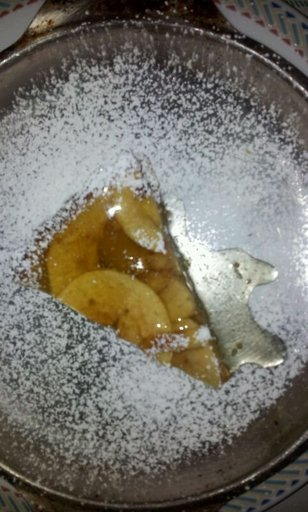

In [ ]:
imagesss = cv2.imread('dataset/train/apple_pie/1005649.jpg')
cv2_imshow(imagesss) # Use cv2_imshow instead of cv2.imshow

In [ ]:
'''
np.save('classes.npy', lb.classes_)  # Save the class names to a file

in app:
import numpy as np
class_names = np.load('classes.npy')

import numpy as np

# Example output from the model
prediction = model.predict(image)
class_index = np.argmax(prediction)  # Get the index of the predicted class
class_name = class_names[class_index]  # Map index back to class name

print(f"Predicted label: {class_name}")


'''

In [ ]:
'''from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras import backend as K
from tensorflow.keras.regularizers import l2'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, Activation, BatchNormalization,
                                     MaxPooling2D, Dropout, GlobalAveragePooling2D,
                                     Dense, Flatten)
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K

'''
class FoodModel:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # Adjust channel dimension for "channels_first" mode
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # First Conv block: Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(32, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Second Conv block: Conv -> ReLU -> BN -> Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))

        # Third Conv block: Conv -> ReLU -> BN -> Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))

        # Fourth Conv block (optional for Food-101): Deeper network for fine-grained features
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.6))

        # Fifth Conv block : Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(128, (3, 3), padding="same", kernel_regularizer=l2(0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.5))

        # Fully connected (Dense) block
        model.add(Flatten())
        model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))
        model.add(BatchNormalization())
        model.add(Dropout(0.6))

        # Output layer: Classes -> softmax activation
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model
'''
'''
class FoodModel:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # Adjust channel dimension for "channels_first" mode
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # First Conv block: Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(32, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Second Conv block: Conv -> ReLU -> BN -> Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))

        # Third Conv block: Conv -> ReLU -> BN -> Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))

        # Fourth Conv block (optional for Food-101): Deeper network for fine-grained features
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))

        # Fully connected (Dense) block
        model.add(Flatten())
        model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))\
        model.add(BatchNormalization())
        model.add(Dropout(0.6))

        # Output layer: Classes -> softmax activation
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model'''
'''
class FoodModel:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # Block 1: Larger filters for initial broad feature extraction
        model.add(Conv2D(32, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Block 2: Refinement with increased filters
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(0.01)))  # Added regularization
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))  # Slightly increased dropout

        # Block 3: Deeper filters for complex feature extraction
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same", kernel_regularizer=l2(0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))  # Increased dropout for deeper layers

        # Block 4 (optional deeper layer, reduced complexity)
        model.add(Conv2D(192, (3, 3), padding="same"))  # Reduced from 256
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.5))  # Further regularization

        # Hybrid Feature Extraction: Combine Flatten and GlobalAveragePooling
        model.add(Flatten())  # Allows for finer-grained features
        model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # Output layer
        model.add(Dense(classes, activation="softmax"))

        return model
'''
'''
class FoodModel:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # First Conv block
        model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))  # Increased Dropout

        # Second Conv block
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(0.01)))  # Added L2 Regularization
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))  # Increased Dropout

        # Third Conv block
        model.add(Conv2D(96, (3, 3), padding="same"))  # Reduced filters
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(96, (3, 3), padding="same", kernel_regularizer=l2(0.01)))  # Added L2 Regularization
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))  # Increased Dropout

        # Fourth Conv block
        model.add(Conv2D(192, (3, 3), padding="same"))  # Reduced filters
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))  # Increased Dropout

        # Fully connected (Dense) block
        model.add(Flatten())
        model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))  # Reduced units + L2 Regularization
        model.add(BatchNormalization())
        model.add(Dropout(0.6))  # Increased Dropout

        # Output layer
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model
'''
'''
class FoodModel:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # Adjust channel dimension for "channels_first" mode
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # First Conv block: Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))

        # Second Conv block: Conv -> ReLU -> BN -> Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))

        # Third Conv block: Conv -> ReLU -> BN -> Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same", kernel_regularizer=l2(0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))

        # Fourth Conv block (optional for Food-101): Deeper network for fine-grained features
        model.add(Conv2D(256, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(256, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))

        # Fully connected (Dense) block
        model.add(Flatten())
        model.add(Dense(512, activation="relu", kernel_regularizer=l2(0.01)))
        model.add(BatchNormalization())
        model.add(Dropout(0.6))

        # Output layer: Classes -> softmax activation
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model
'''

class FoodModel:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # Adjust channel dimension for "channels_first" mode
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # First Conv block: Larger filter to capture broad features
        model.add(Conv2D(32, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))  # Use (2,2) for consistent downsampling
        model.add(Dropout(0.25))

        # Second Conv block: Increase filters to refine features
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))

        # Third Conv block: Further refinement with deeper filters
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.5))

        # Fully connected (Dense) block
        model.add(Flatten())
        model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))
        model.add(BatchNormalization())
        model.add(Dropout(0.6))

        # Output layer: Matches the number of classes
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model


In [ ]:
'''
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


'''

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
'''
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)'''

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # Reserve 20% for validation
)

# Rescaling for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Training generator (80% of training data)
train_generator = train_datagen.flow_from_directory(
    directory='dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset="training"  # Training subset
)

# Validation generator (20% of training data)
validation_generator = train_datagen.flow_from_directory(
    directory='dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # Ensure validation order is consistent
    subset="validation"  # Validation subset
)

# Test generator remains unchanged
test_generator = test_datagen.flow_from_directory(
    directory='dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # Ensure validation order is consistent
)

'''
validation set = test set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Rescaling for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    directory='dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    directory='dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
'''
print(f"Class indices train: {train_generator.class_indices}")  # Display folder-to-label mapping
print(f"Class indices test: {test_generator.class_indices}")  # Display folder-to-label mapping



Found 6000 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Class indices train: {'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9}
Class indices test: {'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9}


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Learning rate scheduler
'''def lr_schedule(epoch, lr):
    return lr * 0.95 if epoch > 5 else lr
'''

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',       # Metric to monitor (e.g., validation loss)
    factor=0.5,               # Reduce learning rate by this factor
    patience=5,               # Wait for 3 epochs with no improvement
    verbose=1,                # Prints updates
    min_lr=1e-6               # Minimum learning rate to prevent it from becoming too small
)

# Build and compile the model
model = FoodModel.build(width=224, height=224, depth=3, classes=10)  # Adjust classes for 10-class testing
#opt = Adam(learning_rate=1e-3)
opt = Adam(learning_rate=2e-4)
#opt = Adam(learning_rate=1e-4)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Callbacks
checkpoint = ModelCheckpoint('food_model.h5', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#callbacks = [checkpoint, LearningRateScheduler(lr_schedule), early_stopping]
callbacks = [checkpoint, early_stopping, reduce_lr]

# Train the model
H = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    epochs=40,
    callbacks=callbacks
)

print("Model training complete and saved as 'food_model.h5'.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.1914 - loss: 8.1041

188/188 ━━━━━━━━━━━━━━━━━━━━ 138s 635ms/step - accuracy: 0.1915 - loss: 8.1013 - val_accuracy: 0.1000 - val_loss: 25.8793 - learning_rate: 2.0000e-04
Epoch 2/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.2700 - loss: 6.4081

188/188 ━━━━━━━━━━━━━━━━━━━━ 115s 561ms/step - accuracy: 0.2700 - loss: 6.4065 - val_accuracy: 0.1260 - val_loss: 13.8839 - learning_rate: 2.0000e-04
Epoch 3/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.3090 - loss: 5.2631

188/188 ━━━━━━━━━━━━━━━━━━━━ 105s 558ms/step - accuracy: 0.3089 - loss: 5.2621 - val_accuracy: 0.1387 - val_loss: 13.6023 - learning_rate: 2.0000e-04
Epoch 4/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.3126 - loss: 4.5055

188/188 ━━━━━━━━━━━━━━━━━━━━ 104s 553ms/step - accuracy: 0.3127 - loss: 4.5046 - val_accuracy: 0.1913 - val_loss: 7.6890 - learning_rate: 2.0000e-04
Epoch 5/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.3295 - loss: 3.9449

188/188 ━━━━━━━━━━━━━━━━━━━━ 139s 537ms/step - accuracy: 0.3295 - loss: 3.9451 - val_accuracy: 0.2560 - val_loss: 7.1880 - learning_rate: 2.0000e-04
Epoch 6/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.3442 - loss: 4.0608

188/188 ━━━━━━━━━━━━━━━━━━━━ 101s 536ms/step - accuracy: 0.3442 - loss: 4.0612 - val_accuracy: 0.2153 - val_loss: 6.1939 - learning_rate: 2.0000e-04
Epoch 7/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.3245 - loss: 4.3992

188/188 ━━━━━━━━━━━━━━━━━━━━ 106s 565ms/step - accuracy: 0.3245 - loss: 4.3989 - val_accuracy: 0.2533 - val_loss: 5.6316 - learning_rate: 2.0000e-04
Epoch 8/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.3450 - loss: 4.1348

188/188 ━━━━━━━━━━━━━━━━━━━━ 105s 556ms/step - accuracy: 0.3450 - loss: 4.1345 - val_accuracy: 0.2860 - val_loss: 4.9541 - learning_rate: 2.0000e-04
Epoch 9/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.3392 - loss: 3.9826

188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 553ms/step - accuracy: 0.3392 - loss: 3.9825 - val_accuracy: 0.3173 - val_loss: 4.6419 - learning_rate: 2.0000e-04
Epoch 10/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 139s 540ms/step - accuracy: 0.3526 - loss: 3.8716 - val_accuracy: 0.3213 - val_loss: 5.0147 - learning_rate: 2.0000e-04
Epoch 11/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.3655 - loss: 3.8185

188/188 ━━━━━━━━━━━━━━━━━━━━ 144s 550ms/step - accuracy: 0.3655 - loss: 3.8185 - val_accuracy: 0.3893 - val_loss: 3.7971 - learning_rate: 2.0000e-04
Epoch 12/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.3748 - loss: 3.6198

188/188 ━━━━━━━━━━━━━━━━━━━━ 106s 566ms/step - accuracy: 0.3748 - loss: 3.6195 - val_accuracy: 0.3500 - val_loss: 3.7069 - learning_rate: 2.0000e-04
Epoch 13/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 98s 519ms/step - accuracy: 0.3999 - loss: 3.3662 - val_accuracy: 0.2373 - val_loss: 7.6893 - learning_rate: 2.0000e-04
Epoch 14/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 99s 528ms/step - accuracy: 0.3953 - loss: 3.5954 - val_accuracy: 0.2493 - val_loss: 7.2595 - learning_rate: 2.0000e-04
Epoch 15/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 529ms/step - accuracy: 0.4131 - loss: 3.5671 - val_accuracy: 0.3480 - val_loss: 3.7755 - learning_rate: 2.0000e-04
Epoch 16/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.4101 - loss: 3.3977

188/188 ━━━━━━━━━━━━━━━━━━━━ 106s 562ms/step - accuracy: 0.4101 - loss: 3.3977 - val_accuracy: 0.3780 - val_loss: 3.4007 - learning_rate: 2.0000e-04
Epoch 17/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.4223 - loss: 3.2439

188/188 ━━━━━━━━━━━━━━━━━━━━ 105s 557ms/step - accuracy: 0.4224 - loss: 3.2438 - val_accuracy: 0.4053 - val_loss: 3.2502 - learning_rate: 2.0000e-04
Epoch 18/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 137s 532ms/step - accuracy: 0.4426 - loss: 3.1691 - val_accuracy: 0.1993 - val_loss: 8.0335 - learning_rate: 2.0000e-04
Epoch 19/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.4544 - loss: 3.0916

188/188 ━━━━━━━━━━━━━━━━━━━━ 145s 551ms/step - accuracy: 0.4543 - loss: 3.0917 - val_accuracy: 0.4293 - val_loss: 3.0839 - learning_rate: 2.0000e-04
Epoch 20/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 99s 529ms/step - accuracy: 0.4560 - loss: 3.0307 - val_accuracy: 0.4080 - val_loss: 3.2173 - learning_rate: 2.0000e-04
Epoch 21/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 98s 519ms/step - accuracy: 0.4705 - loss: 3.0317 - val_accuracy: 0.3240 - val_loss: 5.1780 - learning_rate: 2.0000e-04
Epoch 22/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 144s 529ms/step - accuracy: 0.4508 - loss: 3.1899 - val_accuracy: 0.4433 - val_loss: 3.2423 - learning_rate: 2.0000e-04
Epoch 23/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 530ms/step - accuracy: 0.4622 - loss: 3.1287 - val_accuracy: 0.2820 - val_loss: 6.2529 - learning_rate: 2.0000e-04
Epoch 24/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.4643 - loss: 3.0855
Epoch 24: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-05.
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 529ms/ste

188/188 ━━━━━━━━━━━━━━━━━━━━ 145s 546ms/step - accuracy: 0.5318 - loss: 2.5636 - val_accuracy: 0.4793 - val_loss: 2.7408 - learning_rate: 1.0000e-04
Epoch 28/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 139s 529ms/step - accuracy: 0.5237 - loss: 2.5522 - val_accuracy: 0.2473 - val_loss: 7.6705 - learning_rate: 1.0000e-04
Epoch 29/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.5418 - loss: 2.4455

188/188 ━━━━━━━━━━━━━━━━━━━━ 148s 561ms/step - accuracy: 0.5417 - loss: 2.4455 - val_accuracy: 0.4973 - val_loss: 2.6066 - learning_rate: 1.0000e-04
Epoch 30/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 137s 538ms/step - accuracy: 0.5347 - loss: 2.3803 - val_accuracy: 0.4360 - val_loss: 2.8539 - learning_rate: 1.0000e-04
Epoch 31/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 140s 527ms/step - accuracy: 0.5448 - loss: 2.3606 - val_accuracy: 0.3513 - val_loss: 3.9447 - learning_rate: 1.0000e-04
Epoch 32/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 524ms/step - accuracy: 0.5686 - loss: 2.2910 - val_accuracy: 0.4267 - val_loss: 3.1401 - learning_rate: 1.0000e-04
Epoch 33/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 99s 529ms/step - accuracy: 0.5531 - loss: 2.2543 - val_accuracy: 0.4620 - val_loss: 2.8620 - learning_rate: 1.0000e-04
Epoch 34/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.5704 - loss: 2.2059
Epoch 34: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
188/188 ━━━━━━━━━━━━━━━━━━━━ 144s 538ms/st

188/188 ━━━━━━━━━━━━━━━━━━━━ 107s 568ms/step - accuracy: 0.6010 - loss: 2.0040 - val_accuracy: 0.5373 - val_loss: 2.2233 - learning_rate: 5.0000e-05
Epoch 37/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 136s 535ms/step - accuracy: 0.5958 - loss: 1.9297 - val_accuracy: 0.4187 - val_loss: 2.8527 - learning_rate: 5.0000e-05
Epoch 38/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 100s 533ms/step - accuracy: 0.6117 - loss: 1.8808 - val_accuracy: 0.3593 - val_loss: 3.4971 - learning_rate: 5.0000e-05
Epoch 39/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 537ms/step - accuracy: 0.6000 - loss: 1.8853 - val_accuracy: 0.4340 - val_loss: 2.8236 - learning_rate: 5.0000e-05
Epoch 40/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 100s 530ms/step - accuracy: 0.5927 - loss: 1.8593 - val_accuracy: 0.4313 - val_loss: 2.8782 - learning_rate: 5.0000e-05
Model training complete and saved as 'food_model.h5'.


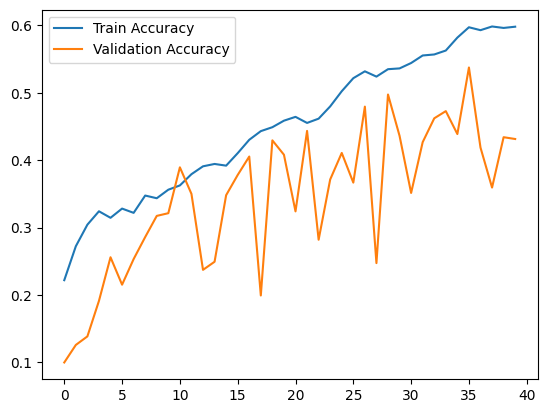

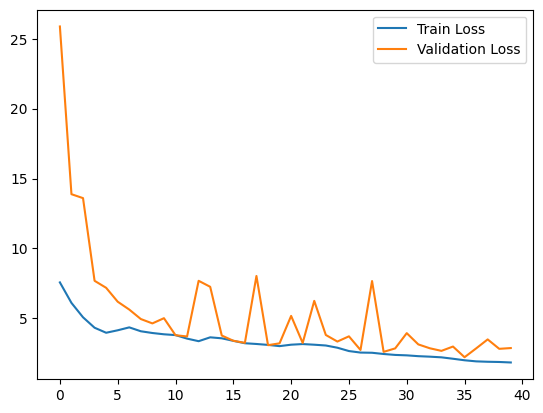

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(H.history['accuracy'], label='Train Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(H.history['loss'], label='Train Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Save label mapping
import numpy as np


np.save('classes.npy', train_generator.class_indices)
print("Class indices saved.")

# Save training history
import pickle
with open('training_history.pkl', 'wb') as f:
    pickle.dump(H.history, f)


Class indices saved.


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import random
import pickle

In [ ]:
#Load the Saved Model
model = load_model("food_model.h5")  # Path to your saved model

#Load the Classes File (classes.npy)
class_indices = np.load("classes.npy", allow_pickle=True).item()  # Load class-to-index mapping
idx_to_class = {v: k for k, v in class_indices.items()}  # Reverse mapping for class names

#Load the Training History File (traininghistory.pkl)
with open("training_history.pkl", "rb") as f:
    history = pickle.load(f)

In [ ]:
#Result of the Training

# Display the final training and validation accuracy
final_training_accuracy = history['accuracy'][-1]
final_validation_accuracy = history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_training_accuracy:.2f}")
print(f"Final Validation Accuracy: {final_validation_accuracy:.2f}")


Final Training Accuracy: 0.60
Final Validation Accuracy: 0.43


In [ ]:
#Evaluate the Model on the Entire Test Dataset

test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 187ms/step - accuracy: 0.4911 - loss: 2.5828
Test Loss: 2.44
Test Accuracy: 0.54


In [ ]:
#Make Predictions on the Entire Test Dataset

predictions = model.predict(test_generator, steps=len(test_generator))  # Predict probabilities for all test images
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
true_classes = test_generator.classes  # Get true labels from the generator

# Display the overall prediction accuracy
overall_accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Prediction Accuracy (Test Dataset): {overall_accuracy:.2f}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step
Prediction Accuracy (Test Dataset): 0.54


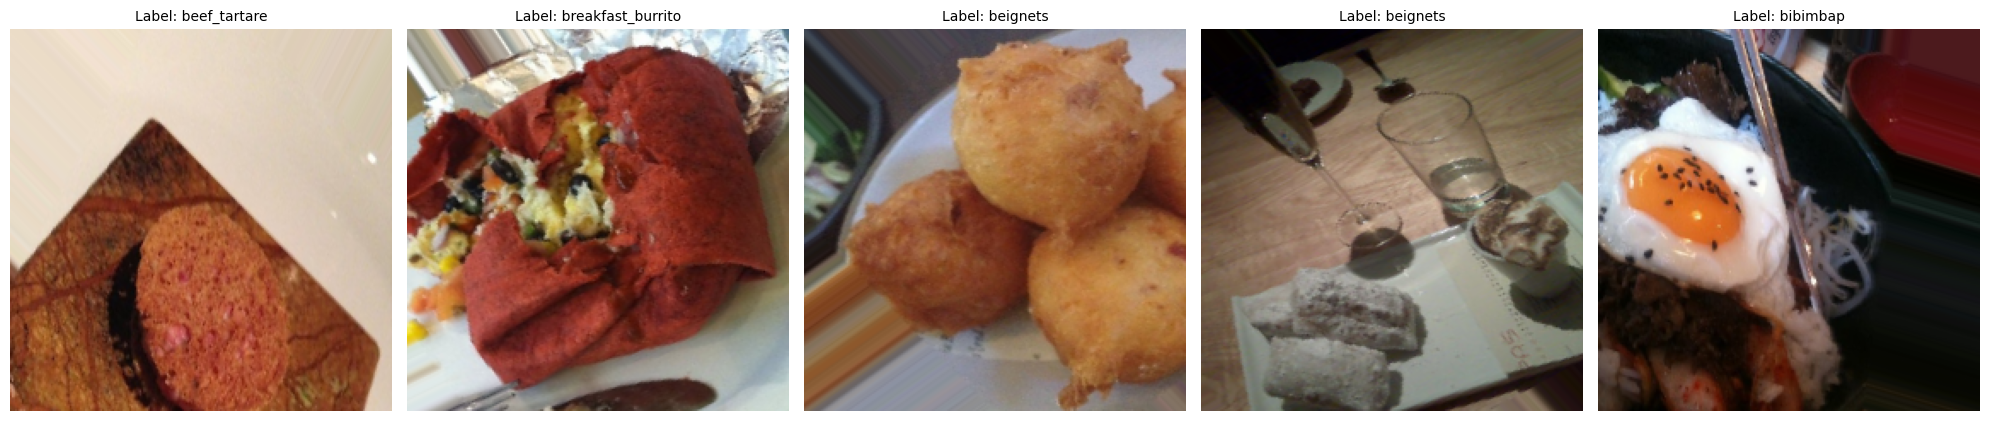

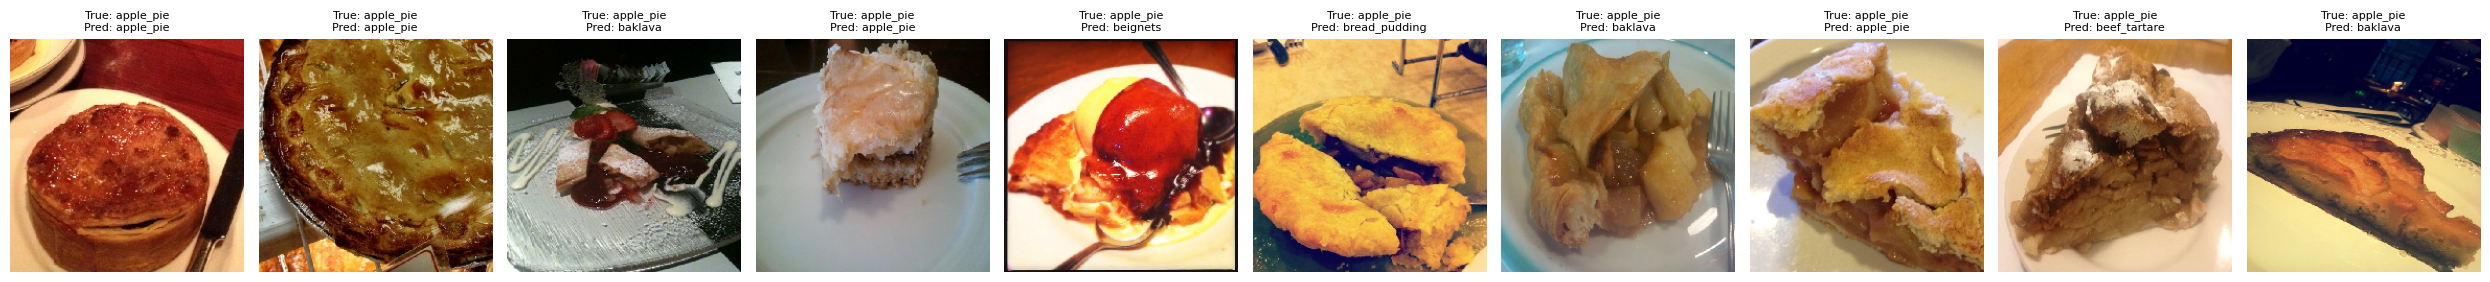

In [ ]:
#train
train_images, train_labels = next(train_generator)  # Fetch one batch of training data

# Select 5 random indices
random_train_indices = random.sample(range(len(train_images)), 5)

# Plot 5 training images with their true labels
fig, axes = plt.subplots(ncols=5, figsize=(20, 5))
for i, idx in enumerate(random_train_indices):
    axes[i].imshow(train_images[idx])  # Display the image
    true_label = idx_to_class[np.argmax(train_labels[idx])]  # Get the true class name
    axes[i].set_title(f"Label: {true_label}", fontsize=10)  # Show the true label
    axes[i].axis("off")  # Turn off axis ticks for better visualization
plt.tight_layout()
plt.show()

#test
# Get a batch of test images and their true labels
test_images, test_labels = next(test_generator)  # Fetch one batch of test data

# Select 10 random indices
random_indices = random.sample(range(len(test_images)), 10)

# Plot 10 test images with their true and predicted labels
fig, axes = plt.subplots(ncols=10, figsize=(25, 5))
for i, idx in enumerate(random_indices):
    axes[i].imshow(test_images[idx])  # Display the image
    true_label = idx_to_class[np.argmax(test_labels[idx])]  # Get the true class name
    #predicted_label = idx_to_class[np.argmax(predictions[idx])]  # Get the predicted class name
    predicted_label = idx_to_class[predicted_classes[idx]]  # Get the predicted class name
    axes[i].set_title(f"True: {true_label}\nPred: {predicted_label}", fontsize=8)
    axes[i].axis("off")
plt.tight_layout()
plt.show()

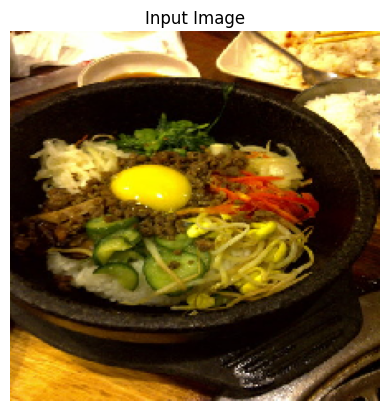

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: bibimbap


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load and preprocess a single image from a specified path
def predict_single_image(model, image_path, class_mapping):
    # Step 1: Load the image
    img = load_img(image_path, target_size=(224, 224))  # Resize to model's input size
    plt.imshow(img)  # Display the image
    plt.axis("off")
    plt.title("Input Image")
    plt.show()

    # Step 2: Convert the image to an array
    img_array = img_to_array(img)  # Convert to NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, height, width, channels)
    img_array = img_array / 255.0  # Normalize the pixel values to [0, 1]

    # Step 3: Make a prediction
    predictions = model.predict(img_array)  # Get prediction probabilities
    predicted_class_index = np.argmax(predictions[0])  # Get the index of the highest probability
    predicted_class_name = class_mapping[predicted_class_index]  # Map index to class name

    # Step 4: Display the prediction
    print(f"Predicted Class: {predicted_class_name}")
    return predicted_class_name

# Example usage
image_path = "/content/dataset/test/bibimbap/1004963.jpg"  # Replace with the path to your image
#image_path = "/content/42361.jpg"  # Replace with the path to your image

predicted_label = predict_single_image(model, image_path, idx_to_class)


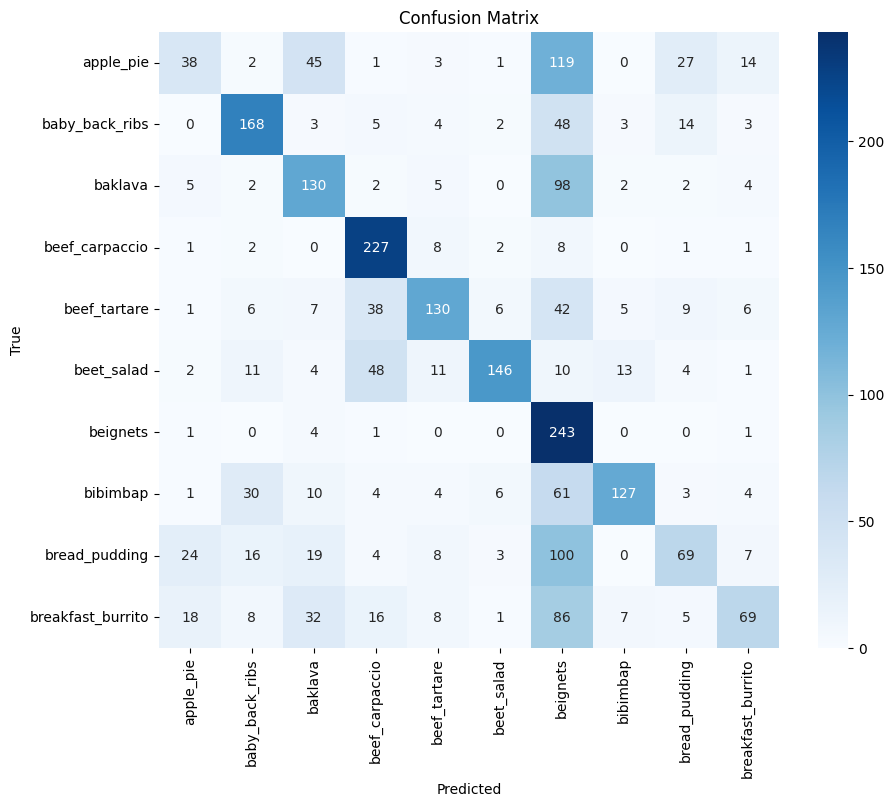

In [ ]:
#Generate and Plot Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)  # Create confusion matrix

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_indices.keys(), yticklabels=class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_indices.keys()))


Classification Report:
                   precision    recall  f1-score   support

        apple_pie       0.42      0.15      0.22       250
   baby_back_ribs       0.69      0.67      0.68       250
          baklava       0.51      0.52      0.52       250
   beef_carpaccio       0.66      0.91      0.76       250
     beef_tartare       0.72      0.52      0.60       250
       beet_salad       0.87      0.58      0.70       250
         beignets       0.30      0.97      0.46       250
         bibimbap       0.81      0.51      0.62       250
    bread_pudding       0.51      0.28      0.36       250
breakfast_burrito       0.63      0.28      0.38       250

         accuracy                           0.54      2500
        macro avg       0.61      0.54      0.53      2500
     weighted avg       0.61      0.54      0.53      2500



# **NOTE**

In [ ]:
#FIRST RUNNING
'''
MODEL:
class FoodModel:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # Adjust channel dimension for "channels_first" mode
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # First Conv block: Larger filter to capture broad features
        model.add(Conv2D(32, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))  # Use (2,2) for consistent downsampling
        model.add(Dropout(0.25))

        # Second Conv block: Increase filters to refine features
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Third Conv block: Further refinement with deeper filters
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Fully connected (Dense) block
        model.add(Flatten())
        model.add(Dense(256))  # Reduced from 512 to 256
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # Output layer: Matches the number of classes
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model

lr = lr scheduler
initial lr:
opt = Adam(learning_rate=1e-3)

RESULT:
Final Training Accuracy: 0.67
Final Validation Accuracy: 0.61

Classification Report:
                   precision    recall  f1-score   support

        apple_pie       0.11      0.18      0.13       250
   baby_back_ribs       0.08      0.12      0.09       250
          baklava       0.11      0.10      0.10       250
   beef_carpaccio       0.08      0.08      0.08       250
     beef_tartare       0.11      0.08      0.09       250
       beet_salad       0.12      0.11      0.11       250
         beignets       0.12      0.12      0.12       250
         bibimbap       0.10      0.10      0.10       250
    bread_pudding       0.11      0.10      0.11       250
breakfast_burrito       0.08      0.04      0.05       250

         accuracy                           0.10      2500
        macro avg       0.10      0.10      0.10      2500
     weighted avg       0.10      0.10      0.10      2500
'''

#second running
'''
MODEL:
class FoodModel:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # Adjust channel dimension for "channels_first" mode
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # First Conv block: Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Second Conv block: Conv -> ReLU -> BN -> Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Third Conv block: Conv -> ReLU -> BN -> Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Fourth Conv block (optional for Food-101): Deeper network for fine-grained features
        model.add(Conv2D(256, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(256, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Fully connected (Dense) block
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # Output layer: Classes -> softmax activation
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model

lr on plateu
initial lr:

opt = Adam(learning_rate=5e-4)

Result:
Final Training Accuracy: 0.60
Final Validation Accuracy: 0.51

Classification Report:
                   precision    recall  f1-score   support

        apple_pie       0.10      0.09      0.09       250
   baby_back_ribs       0.11      0.21      0.14       250
          baklava       0.09      0.09      0.09       250
   beef_carpaccio       0.11      0.10      0.10       250
     beef_tartare       0.11      0.06      0.08       250
       beet_salad       0.09      0.07      0.08       250
         beignets       0.09      0.18      0.12       250
         bibimbap       0.07      0.06      0.07       250
    bread_pudding       0.08      0.07      0.08       250
breakfast_burrito       0.07      0.03      0.04       250

         accuracy                           0.10      2500
        macro avg       0.09      0.10      0.09      2500
     weighted avg       0.09      0.10      0.09      2500
'''

#fifth run
'''
MODEL:

class FoodModel:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # Block 1
        model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Block 2
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Block 3
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same", kernel_regularizer=l2(0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))

        # Optional Block 4 (Deeper layer for more complexity)
        model.add(Conv2D(256, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(256, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))

        # Add GlobalAveragePooling2D
        model.add(GlobalAveragePooling2D())

        # Dense block
        model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        # Output layer
        model.add(Dense(classes, activation="softmax"))

        return model

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',       # Metric to monitor (e.g., validation loss)
    factor=0.5,               # Reduce learning rate by this factor
    patience=3,               # Wait for 3 epochs with no improvement
    verbose=1,                # Prints updates
    min_lr=1e-6               # Minimum learning rate to prevent it from becoming too small
)

# Build and compile the model
model = FoodModel.build(width=224, height=224, depth=3, classes=10)  # Adjust classes for 10-class testing
opt = Adam(learning_rate=2e-4)


Result:
Final Training Accuracy: 0.59
Final Validation Accuracy: 0.46
'''

#sixth run
'''
MODEL:
class FoodModel:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # Block 1: Larger filters for initial broad feature extraction
        model.add(Conv2D(32, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Block 2: Refinement with increased filters
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(0.01)))  # Added regularization
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))  # Slightly increased dropout

        # Block 3: Deeper filters for complex feature extraction
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same", kernel_regularizer=l2(0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))  # Increased dropout for deeper layers

        # Block 4 (optional deeper layer, reduced complexity)
        model.add(Conv2D(192, (3, 3), padding="same"))  # Reduced from 256
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))  # Further regularization

        # Hybrid Feature Extraction: Combine Flatten and GlobalAveragePooling
        model.add(Flatten())  # Allows for finer-grained features
        model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # Output layer
        model.add(Dense(classes, activation="softmax"))

        return model

LR 2e-4
reduceonplateu

Result:
Final Training Accuracy: 0.53
Final Validation Accuracy: 0.52

test: 0.56

'''

#seventh run
'''
model:


class FoodModel:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # Block 1: Larger filters for initial broad feature extraction
        model.add(Conv2D(32, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Block 2: Refinement with increased filters
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(0.01)))  # Added regularization
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))  # Slightly increased dropout

        # Block 3: Deeper filters for complex feature extraction
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same", kernel_regularizer=l2(0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))  # Increased dropout for deeper layers

        # Block 4 (optional deeper layer, reduced complexity)
        model.add(Conv2D(192, (3, 3), padding="same"))  # Reduced from 256
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.5))  # Further regularization

        # Hybrid Feature Extraction: Combine Flatten and GlobalAveragePooling
        model.add(Flatten())  # Allows for finer-grained features
        model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # Output layer
        model.add(Dense(classes, activation="softmax"))

        return model


reduceonplateu, 1e-4
Final Training Accuracy: 0.52
Final Validation Accuracy: 0.20
'''


#eigth run
'''
model:
class FoodModel:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # Block 1
        model.add(Conv2D(32, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Block 2
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(0.001)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))

        # Block 3
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same", kernel_regularizer=l2(0.001)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))

        # Block 4
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))

        # Flatten + Dense
        model.add(Flatten())
        model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.001)))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(128, activation="relu"))
        model.add(Dropout(0.4))

        # Output layer
        model.add(Dense(classes, activation="softmax"))
        return model

reduceonplateu 2e-4

60 train, 43 validation
'''

#ninth run
'''
class FoodModel:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # Adjust channel dimension for "channels_first" mode
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # First Conv block: Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(32, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Second Conv block: Conv -> ReLU -> BN -> Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))

        # Third Conv block: Conv -> ReLU -> BN -> Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))

        # Fourth Conv block (optional for Food-101): Deeper network for fine-grained features
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))

        # Fully connected (Dense) block
        model.add(Flatten())
        model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))
        model.add(BatchNormalization())
        model.add(Dropout(0.6))

        # Output layer: Classes -> softmax activation
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model

reduceonplateu, 2e-4
Final Training Accuracy: 0.57
Final Validation Accuracy: 0.53
Prediction Accuracy (Test Dataset): 0.61

Classification Report:
                   precision    recall  f1-score   support

        apple_pie       0.43      0.31      0.36       250
   baby_back_ribs       0.61      0.81      0.70       250
          baklava       0.60      0.64      0.62       250
   beef_carpaccio       0.75      0.76      0.76       250
     beef_tartare       0.61      0.70      0.65       250
       beet_salad       0.97      0.36      0.52       250
         beignets       0.59      0.94      0.72       250
         bibimbap       0.65      0.83      0.73       250
    bread_pudding       0.66      0.20      0.31       250
breakfast_burrito       0.50      0.58      0.54       250

         accuracy                           0.61      2500
        macro avg       0.64      0.61      0.59      2500
     weighted avg       0.64      0.61      0.59      2500

'''

#tenth run
'''
model:
class FoodModel:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # Adjust channel dimension for "channels_first" mode
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # First Conv block: Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(32, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Second Conv block: Conv -> ReLU -> BN -> Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))

        # Third Conv block: Conv -> ReLU -> BN -> Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))

        # Fourth Conv block (optional for Food-101): Deeper network for fine-grained features
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.6))

        # Fully connected (Dense) block
        model.add(Flatten())
        model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))
        model.add(BatchNormalization())
        model.add(Dropout(0.6))

        # Output layer: Classes -> softmax activation
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model

reduceonplateu patience 5, initial: 2e-4

Final Training Accuracy: 0.64
Final Validation Accuracy: 0.61
Prediction Accuracy (Test Dataset): 0.64

Classification Report:
                   precision    recall  f1-score   support

        apple_pie       0.51      0.26      0.34       250
   baby_back_ribs       0.66      0.81      0.73       250
          baklava       0.49      0.72      0.58       250
   beef_carpaccio       0.85      0.71      0.77       250
     beef_tartare       0.66      0.70      0.68       250
       beet_salad       0.87      0.67      0.76       250
         beignets       0.58      0.94      0.72       250
         bibimbap       0.75      0.85      0.80       250
    bread_pudding       0.50      0.48      0.49       250
breakfast_burrito       0.69      0.28      0.40       250

         accuracy                           0.64      2500
        macro avg       0.66      0.64      0.63      2500
     weighted avg       0.66      0.64      0.63      2500

'''

#continue check 2e4 and 2d

In [ ]:
#model1 = load_model("food_model (53 52).h5")  # Path to your saved model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,236,108 (4.72 MB)

 Trainable params: 1,233,738 (4.71 MB)

 Non-trainable params: 2,368 (9.25 KB)

 Optimizer params: 2 (12.00 B)